<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Partie1:
#Utilisation des librairies Pandas + Matplotlib 
#pour bien comprendre notre Dataset (Lecture et visualisation des données de notre Dataset)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes (5).csv


In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(n=1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Notre Dataset contient 768 ligne et 9 colonnes 
dataset.shape

(768, 9)

In [ ]:
#Déscription statistique de notre Dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#On a 268 patients qui sont diabétique et les 500 autres non
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#Partie 2 : Visualisation des données

Text(0, 0.5, 'Count')

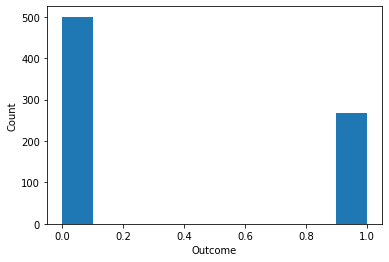

In [ ]:
#Un histogramme qui montre le nombre de personnes diabétique et non-diabétique
plt.hist(dataset['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')

No handles with labels found to put in legend.


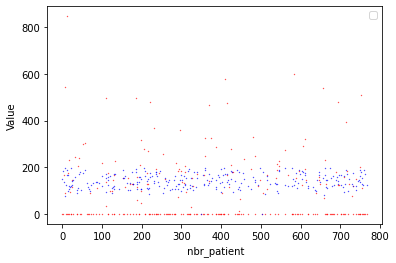

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].index,dataset[dataset.Outcome==1].Insulin,label="",c="r",s=0.1)
#plt.scatter(dataset[dataset.Outcome==0].index,dataset[dataset.Outcome==0].BloodPressure,label="No Diabétique",c="b",s=0.2)
plt.scatter(dataset[dataset.Outcome==1].index,dataset[dataset.Outcome==1].Glucose,label="",c="b",s=0.1)


plt.xlabel(" nbr_patient")
plt.ylabel("Value")
plt.legend()

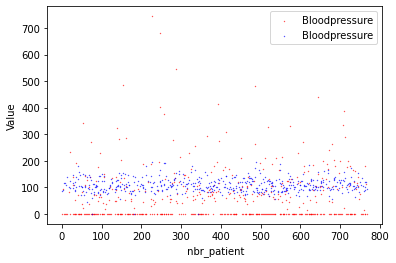

In [ ]:
plt.scatter(dataset[dataset.Outcome==0].index,dataset[dataset.Outcome==0].Insulin,label="Bloodpressure",c="r",s=0.1)
#plt.scatter(dataset[dataset.Outcome==0].index,dataset[dataset.Outcome==0].BloodPressure,label="No Diabétique",c="b",s=0.2)
plt.scatter(dataset[dataset.Outcome==0].index,dataset[dataset.Outcome==0].Glucose,label="Bloodpressure",c="b",s=0.1)


plt.xlabel(" nbr_patient")
plt.ylabel("Value")
plt.legend()

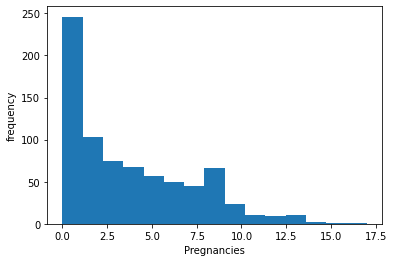

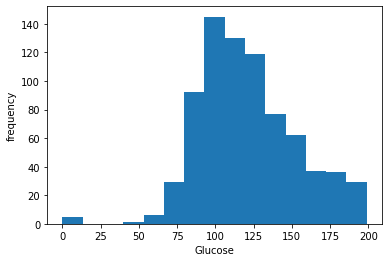

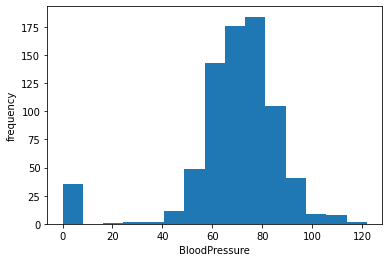

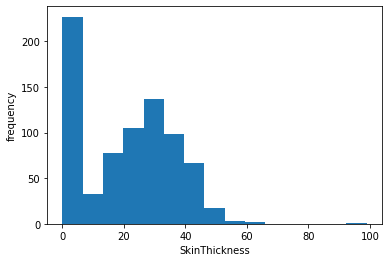

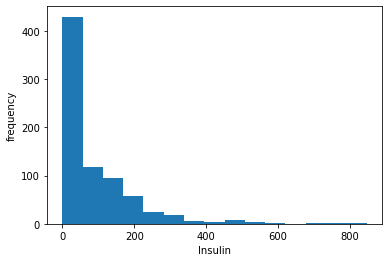

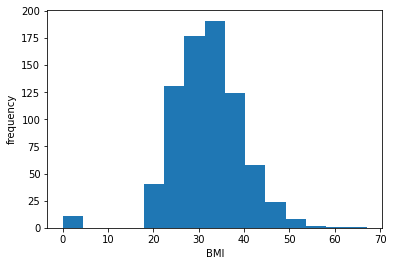

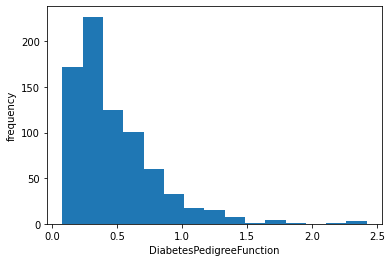

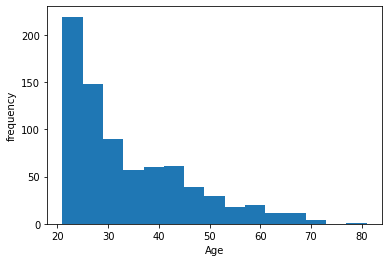

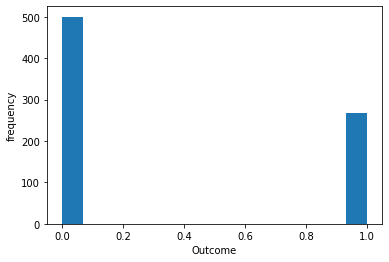

In [ ]:
for c in dataset.columns:
    plt.figure()
    plt.hist(dataset[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

In [ ]:
#Partie 3: Data Preprocessing

In [ ]:
dataset_new = dataset

In [ ]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#data_new = dataset
#dataset_new[replace_list_column] = dataset[replace_list_column].replace(0, np.NaN)

import random
replace_min_insulin0 = 16
replace_max_insulin0 = 166
replace_min_insulin1 = 170
replace_max_insulin1 = dataset_new['Insulin'].max()

replace_min_glucose0 = dataset_new['Glucose'].min()
replace_min_bp0 = dataset_new['BloodPressure'].min()


replace_max_insulin0 = 166
replace_max_glucose0 = 140
replace_max_bp0 = 60


replace_min_insulin1 = 170
replace_min_glucose1 = 170
replace_min_bp1 = dataset_new['BloodPressure'].max()

replace_max_insulin1 = dataset_new['Insulin'].max()
replace_max_glucose1 = dataset_new['Glucose'].max()
replace_max_bp1 = dataset_new['BloodPressure'].max()

replace_skin_min = dataset_new['SkinThickness'].min() 
replace_skin_max = dataset_new['SkinThickness'].max() 

for col in replace_list_column:
    for li in dataset_new.index:
        if(dataset_new["Outcome"][li]==0 and dataset_new[col][li]==0):
            if(col=="Insulin"):
              dataset_new[col][li]=random.uniform(replace_min_insulin0, replace_max_insulin0)
            if(col=="Glucose"):
              dataset_new[col][li]=random.uniform(replace_min_glucose0, replace_max_glucose0)
            if(col=="BloodPressure"):
              dataset_new[col][li]=random.uniform(replace_min_bp0, replace_max_bp0)
            if(col=="SkinThickness"):
              dataset_new[col][li]=random.uniform(replace_skin_min, replace_skin_max)

        elif(dataset_new["Outcome"][li]==1 and dataset_new[col][li]==0):
          if(col=="Insulin"):
              dataset_new[col][li]=random.uniform(replace_min_insulin1, replace_max_insulin1)
          if(col=="Glucose"):
              dataset_new[col][li]=random.uniform(replace_min_glucose1, replace_max_glucose1)
          if(col=="BloodPressure"):
              dataset_new[col][li]=random.uniform(replace_min_bp1, replace_max_bp1)
          if(col=="SkinThickness"):
              dataset_new[col][li]=random.uniform(replace_skin_min, replace_skin_max)
dataset_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,434,33.6,0.627,50,1
1,1,85,66,29,147,26.6,0.351,31,0
2,8,183,64,59,489,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,145,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,12,399,30.1,0.349,47,1


In [ ]:
dataset_new.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(dataset_new[np.isfinite(dataset_new) == True])

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


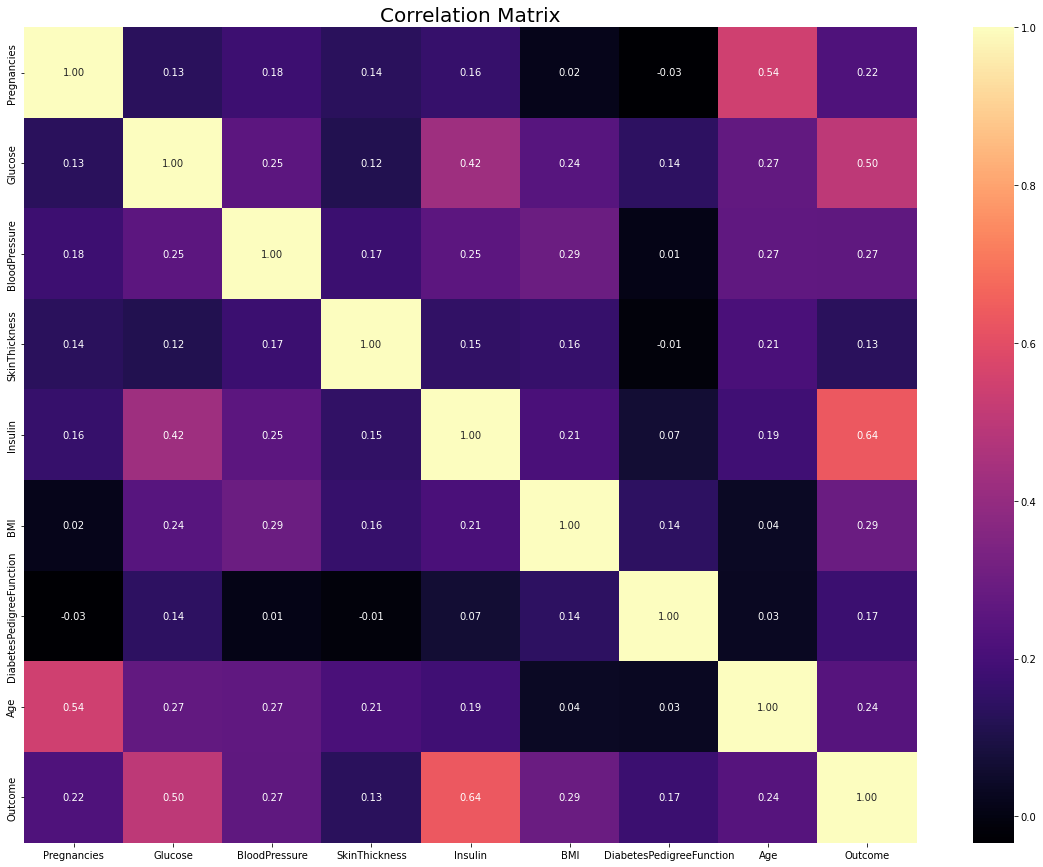

In [ ]:
import seaborn as sns
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    '''corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    '''
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)

plot_corr(dataset_new)

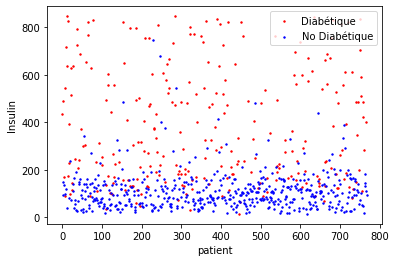

In [ ]:
plt.scatter(dataset_new[dataset_new.Outcome==1].index,dataset_new[dataset_new.Outcome==1].Insulin,label="Diabétique",c="r",s=2)
plt.scatter(dataset_new[dataset_new.Outcome==0].index,dataset_new[dataset_new.Outcome==0].Insulin,label="No Diabétique",c="b",s=2)
plt.xlabel("patient")
plt.ylabel("Insulin")
plt.legend()


In [ ]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,434,33.6,0.627,50,1
1,1,85,66,29,147,26.6,0.351,31,0
2,8,183,64,59,489,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,145,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,12,399,30.1,0.349,47,1


In [218]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_new.iloc[:, [1,2,3,4,5,6,7]].values
Y = dataset_new.iloc[:, 8].values

X

array([[1.190e+02, 8.600e+01, 3.000e+01, ..., 4.172e+01, 2.600e-01,
        4.200e+01],
       [1.730e+02, 7.800e+01, 3.900e+01, ..., 3.400e+01, 1.010e+00,
        3.100e+01],
       [8.800e+01, 8.600e+01, 1.900e+01, ..., 3.103e+01, 3.300e-01,
        3.400e+01],
       ...,
       [9.800e+01, 5.200e+01, 5.200e+01, ..., 3.132e+01, 1.400e-01,
        2.200e+01],
       [1.790e+02, 9.000e+01, 2.700e+01, ..., 4.471e+01, 7.200e-01,
        2.300e+01],
       [1.220e+02, 2.800e+01, 2.900e+01, ..., 3.766e+01, 1.400e-01,
        2.900e+01]])

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3, random_state=42, stratify=dataset_new['Outcome'])

x_train

array([[8.40e+01, 3.30e+01, 7.54e+02, 3.55e+01, 3.55e-01, 4.10e+01],
       [7.80e+01, 8.10e+01, 1.28e+02, 3.12e+01, 3.82e-01, 4.20e+01],
       [6.40e+01, 3.50e+01, 1.19e+02, 3.05e+01, 1.40e+00, 3.40e+01],
       ...,
       [7.00e+01, 4.00e+01, 1.61e+02, 3.81e+01, 2.18e-01, 3.00e+01],
       [9.20e+01, 8.00e+01, 4.86e+02, 3.55e+01, 2.78e-01, 6.60e+01],
       [5.80e+01, 2.80e+01, 1.40e+02, 2.95e+01, 2.87e-01, 3.70e+01]])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
# Checking dimensions
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)


X_train shape: (537, 6)
X_test shape: (231, 6)
Y_train shape: (537,)
Y_test shape: (231,)


In [ ]:
x_train

array([[8.40e+01, 3.30e+01, 7.54e+02, 3.55e+01, 3.55e-01, 4.10e+01],
       [7.80e+01, 8.10e+01, 1.28e+02, 3.12e+01, 3.82e-01, 4.20e+01],
       [6.40e+01, 3.50e+01, 1.19e+02, 3.05e+01, 1.40e+00, 3.40e+01],
       ...,
       [7.00e+01, 4.00e+01, 1.61e+02, 3.81e+01, 2.18e-01, 3.00e+01],
       [9.20e+01, 8.00e+01, 4.86e+02, 3.55e+01, 2.78e-01, 6.60e+01],
       [5.80e+01, 2.80e+01, 1.40e+02, 2.95e+01, 2.87e-01, 3.70e+01]])

In [ ]:
from sklearn import model_selection
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[i for i in range(1,50,2)]}
#x = range(1,31)
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=3,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(x_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params'],
         # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params,
    ) )



Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 23}
Résultats de la validation croisée :
accuracy = 0.788 (+/-0.024) for {'n_neighbors': 1}
accuracy = 0.827 (+/-0.016) for {'n_neighbors': 3}
accuracy = 0.825 (+/-0.035) for {'n_neighbors': 5}
accuracy = 0.827 (+/-0.040) for {'n_neighbors': 7}
accuracy = 0.829 (+/-0.035) for {'n_neighbors': 9}
accuracy = 0.834 (+/-0.029) for {'n_neighbors': 11}
accuracy = 0.836 (+/-0.014) for {'n_neighbors': 13}
accuracy = 0.834 (+/-0.011) for {'n_neighbors': 15}
accuracy = 0.836 (+/-0.014) for {'n_neighbors': 17}
accuracy = 0.832 (+/-0.009) for {'n_neighbors': 19}
accuracy = 0.836 (+/-0.019) for {'n_neighbors': 21}
accuracy = 0.838 (+/-0.018) for {'n_neighbors': 23}
accuracy = 0.832 (+/-0.009) for {'n_neighbors': 25}
accuracy = 0.831 (+/-0.005) for {'n_neighbors': 27}
accuracy = 0.829 (+/-0.005) for {'n_neighbors': 29}
accuracy = 0.827 (+/-0.009) for {'n_neighbors': 31}
accuracy = 0.827 (+/-0.009) for {'n_neighbors': 33}
accurac

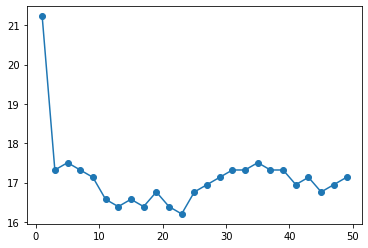

In [ ]:
from zipfile import error
plt.plot(range(1,50,2), 100*(1-clf.cv_results_['mean_test_score']), 'o-')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8268398268398268

In [ ]:
cpt = 0
for i in range(len(y_pred)):
  if y_pred[i] != y_test[i]:
    cpt +=1

cpt

40

In [ ]:
x_test.shape

(231, 6)

In [ ]:
rate = cpt / y_test.shape[0]
rate

0.17316017316017315

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
      if y_actual[i]==y_pred[i]==1:
         TP += 1
      if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
         FP += 1
      if y_actual[i]==y_pred[i]==0:
         TN += 1
      if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
         FN += 1

    return(TP, FP, TN, FN)

TP,FP,TN,FN = perf_measure(y_test, y_pred)

precision = TP/(TP+FP)
recall = TP/(TP+FN)

(precision, recall)

(0.7808219178082192, 0.7037037037037037)